In [1]:
from helper import generate_heisenberg_observable_data, plot_error_vs_depth

Define parameters

In [2]:
J = 1
g = 0.5
dt = 0.1
num_qubits = 16
pad = 1

# thresholds = [1e-8]
max_bonds = [256]
thresholds = [0]
# max_bonds = [64]
timesteps_list = [1, 5, *range(10, 110, 10)]
timesteps_list = [*range(1, 11)]

In [ ]:
results = generate_heisenberg_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list)

In [ ]:
import matplotlib.pyplot as plt

def plot_error_vs_depth(results, bond_dims):
    # Create a 1xN figure (one subplot per threshold)
    fig, axes = plt.subplots(2, 1, sharex=True)
    # Map bond dimensions to distinct colors
    color_map = {4: 'red', 8: 'green', 16: 'blue', 32: 'black', 256: 'black'}
    # Use different markers for each simulator
    marker_map = {'TEBD': 'o', 'TDVP': '^'}

    axes[0].set_title("Infidelity")
    axes[1].set_title("Local Observable Error")
    for i, name in enumerate(['infidelity', 'error']):
        ax = axes[i]

        # Create an inset in the lower right corner
        # ax_inset = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
        # ax_inset.set_title("TDVP Advantage", fontsize=8)
        # ax_inset.tick_params(axis='both', labelsize=8)
        # ax_inset.set_ylim(0.5e-1, 1e8)
        for bond_dim in bond_dims:
            # Extract data for TEBD and TDVP
            if name == 'infidelity':
                tebd_data = [
                    (depth, infid)
                    for (depth, thr, bd, infid, err) in results['TEBD']
                    if bd == bond_dim
                ]
                tdvp_data = [
                    (depth, infid)
                    for (depth, thr, bd, infid, err) in results['TDVP']
                    if bd == bond_dim
                ]
            elif name == 'error':
                tebd_data = [
                    (depth, err)
                    for (depth, thr, bd, infid, err) in results['TEBD']
                    if bd == bond_dim
                ]
                tdvp_data = [
                    (depth, err)
                    for (depth, thr, bd, infid, err) in results['TDVP']
                    if bd == bond_dim
                ]

            # Sort by circuit depth
            tebd_data.sort(key=lambda x: x[0])
            tdvp_data.sort(key=lambda x: x[0])

            # Unpack for plotting
            tebd_depths = [x[0] for x in tebd_data]
            tebd_errors = [x[1] for x in tebd_data]
            tdvp_depths = [x[0] for x in tdvp_data]
            tdvp_errors = [x[1] for x in tdvp_data]

            # Plot main curves on the primary axis
            ax.plot(
                tebd_depths,
                tebd_errors,
                label=f"TEBD, bond={bond_dim}" if i == 0 else "",
                color=color_map[bond_dim],
                marker=marker_map['TEBD'],
                linestyle='--'
            )
            ax.plot(
                tdvp_depths,
                tdvp_errors,
                label=f"TDVP, bond={bond_dim}" if i == 0 else "",
                color=color_map[bond_dim],
                marker=marker_map['TDVP'],
                linestyle='-'
            )

            ratio_errors = [te / td for td, te in zip(tdvp_errors, tebd_errors)]
            # ax_inset.axhline(1, color='k', linestyle='--')  # reference line at ratio = 1
            # Plot the difference in the inset axis
            # ax_inset.plot(
            #     tdvp_depths,
            #     ratio_errors,
            #     label=f"bond={bond_dim}",
            #     color=color_map[bond_dim],
            #     marker=marker_map['TDVP'],
            #     linestyle='-'
            # )
            # ax_inset.set_yscale('log')


        ax.set_yscale("log")
        ax.set_ylim(1e-16, 5e-1)

        ax.grid(True)

        # Add a horizontal line at 0 in the inset to mark no difference
        # ax_inset.axhline(0, color='black', linestyle='--', linewidth=1)

    axes[1].set_ylabel("Circuit depth (Trotter steps)")
    axes[0].set_ylabel("Infidelity (log scale)")
    axes[1].set_ylabel("Local observable error (log scale)")

    axes[0].legend(loc="upper left", fontsize="small")
    axes[0].set_xlabel("Circuit depth (Trotter steps)")
    axes[0].set_xlabel(None)
    plt.tight_layout()
    plt.show()


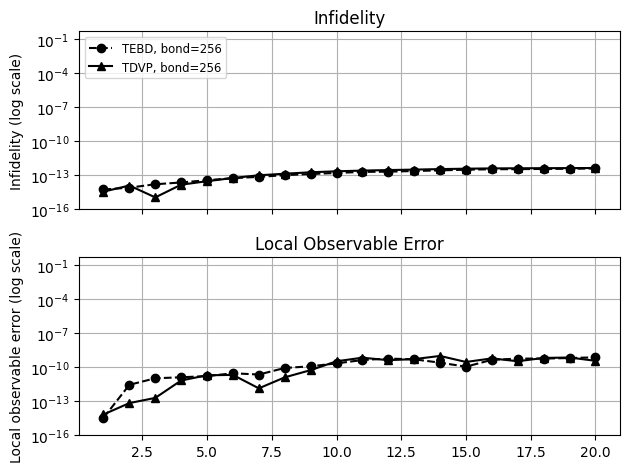

In [ ]:
plot_error_vs_depth(results, max_bonds)